
# Cardiac Arrhythmia

  **1.  Project Name :**

    Prediction and Classification of Cardiac Arrhythmia.

  **2.  Introduction:**

    Arrhythmia can be diagnosed by measuring the heart activity using an instrument called Electrocardiogram (ECG)  and then analysing the recorded data. The ECG is an established technique in cardiology for the analysis of cardiac condition of the patients. In its basic definition, ECG is the electrical representation of the contractile activity of the heart, and can be recorded fairly easily by using surface electrodes on the limbs or chest of the patient. The ECG is one of the most recognized and used biomedical signal in the field of medicine. The rhythm of the heart in terms of beats per minute (bpm) can be easily calculated by counting the R peaks of the ECG wave during one minute of recording.
    
   Below is a schematic sample of a normal ECG.
    
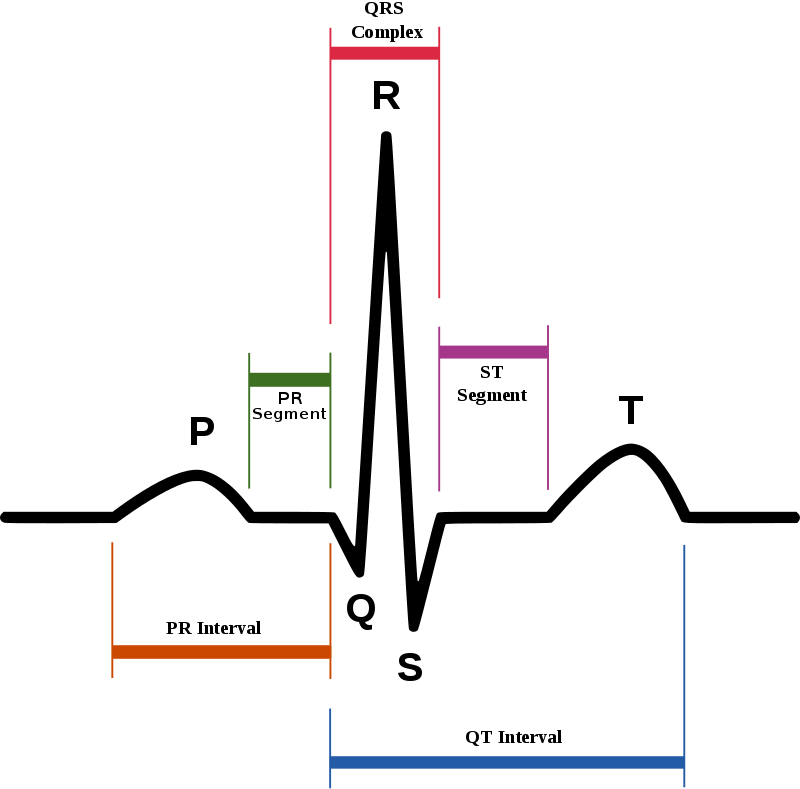

    Irregularity in heart beat may be life threatening. Hence both accurate detection of presence as well as classification of arrhythmia are important. 
   
    Different parameter values can be extracted from the ECG waveforms and can be used along with other information about the patient like age, medical history, etc to detect arrythmia. However, sometimes it may be difficult for a doctor to look at these long duration ECG recordings and find minute irregularities. Therefore, using machine learning for automating arrhythmia diagnosis can be very helpful. 
   
    This project aims using different machine learning algorithms for predicting and classifying arrhythmia into different categories.

   **3. Data Set:**
          
        The data set of project is from UC Irvine Machine Learning Repository. https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data

        Cardiac Arrythmia Database contains 279 attributes, 206 of which are linear valued and the rest are nominal.

        Number of Instances: 452 Number of Attributes: 279

        The CSV file uploaded to Github repository as well. https://github.com/MuzafferEstelik/Capstone_Project_1/blob/master/arrhythmia.csv

       The data set is labeled with 16 different classes. Classes 2 to 15 correspond to different types of arrhythmia. Class 1 corresponds to normal ECG with no arrhythmia and class 16 refers to unlabeled patient.
    
    
       The data set is heavily biased towards the no arrhythmia case with 245 instances belonging to class 1 and 185  instances being split among the 14 arrhythmia classes and the rest 22 are unclassified. 
    
       The main challenges in processing this data set are the limited number of training examples compared to the number of features, heavy bias towards the case of normal ECG.


I will complete this project on Jupyter Notebook using the project guidelines of **David Yakobovitch** (https://github.com/davidyakobovitch/project_guidelines). 

First I will examine data, then wrangle the data and apply ML algorithms. Hopefully I will have learned the basic concepts of data science (Wrangling, Exploratory Data Analysis (EDA) and ML)

    a. Data Collection

    b. Data Wrangling

    c. EDA (Exploratory Data Analysis)

    d. Modeling

    e. Presentation



In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [66]:
data = pd.read_csv('arrhythmia.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [67]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [68]:
data.shape

(452, 280)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.8+ KB


In [70]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,452.0,46.471239,16.466631,0.0,36.000,47.00,58.000,83.0
1,452.0,0.550885,0.497955,0.0,0.000,1.00,1.000,1.0
2,452.0,166.188053,37.170340,105.0,160.000,164.00,170.000,780.0
3,452.0,68.170354,16.590803,6.0,59.000,68.00,79.000,176.0
4,452.0,88.920354,15.364394,55.0,80.000,86.00,94.000,188.0
5,452.0,155.152655,44.842283,0.0,142.000,157.00,175.000,524.0
6,452.0,367.207965,33.385421,232.0,350.000,367.00,384.000,509.0
7,452.0,169.949115,35.633072,108.0,148.000,162.00,179.000,381.0
8,452.0,90.004425,25.826643,0.0,79.000,91.00,102.000,205.0
9,452.0,33.676991,45.431434,-172.0,3.750,40.00,66.000,169.0


In [71]:
#Let's see how many missing data we have and replace them with NaN's:
count=0
for i in range(0,452):
    for j in range(0,280):
        if (data.iloc[i,j]=='?'):
            count =count+1
print(count)
data = data.replace('?', np.NaN)

408


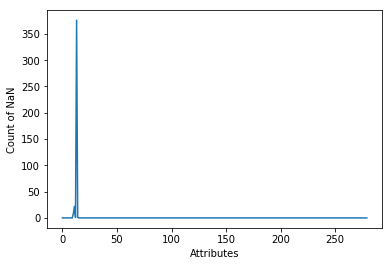

In [72]:
#Now let's see the distribution of our missing data: 
pd.isnull(data).sum().plot()
plt.xlabel('Attributes')
plt.ylabel('Count of NaN');

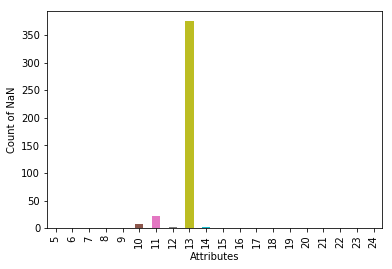

In [73]:
#zooming in :
pd.isnull(data).sum()[5:25].plot(kind='bar')
plt.xlabel('Attributes')
plt.ylabel('Count of NaN');

In [74]:
#dropping column 13
data.drop(columns = 13, inplace=True)

In [75]:
import fancyimpute
data_no_missing = fancyimpute.KNN(k=5).complete(data)

Imputing row 1/452 with 0 missing, elapsed time: 0.225
Imputing row 101/452 with 0 missing, elapsed time: 0.226
Imputing row 201/452 with 1 missing, elapsed time: 0.226
Imputing row 301/452 with 1 missing, elapsed time: 0.227
Imputing row 401/452 with 0 missing, elapsed time: 0.227


In [76]:
data_no_missing=pd.DataFrame(data_no_missing)
data_no_missing.head()

,0,1,2,3,4,5,6,7,8,9,...,269,270,271,272,273,274,275,276,277,278
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [77]:
#Adding column names
X_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]

In [79]:
X = data_no_missing.drop(columns = 278)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.1,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,-0.4,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8


In [80]:
X.columns = X_columns
X.head().transpose()

,0,1,2,3,4
Age,75.0,56.0,54.0,55.0,75.00000
Sex,0.0,1.0,0.0,0.0,0.00000
Height,190.0,165.0,172.0,175.0,190.00000
Weight,80.0,64.0,95.0,94.0,80.00000
QRS_Dur,91.0,81.0,138.0,100.0,88.00000
P-R_Int,193.0,174.0,163.0,202.0,181.00000
Q-T_Int,371.0,401.0,386.0,380.0,360.00000
T_Int,174.0,149.0,185.0,179.0,177.00000
P_Int,121.0,39.0,102.0,143.0,103.00000
QRS,-16.0,25.0,96.0,28.0,-16.00000


In [81]:
y = data[279]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

In [82]:
y.columns = ["Class"]
y.head()

0     8
1     6
2    10
3     1
4     7
Name: 279, dtype: int64

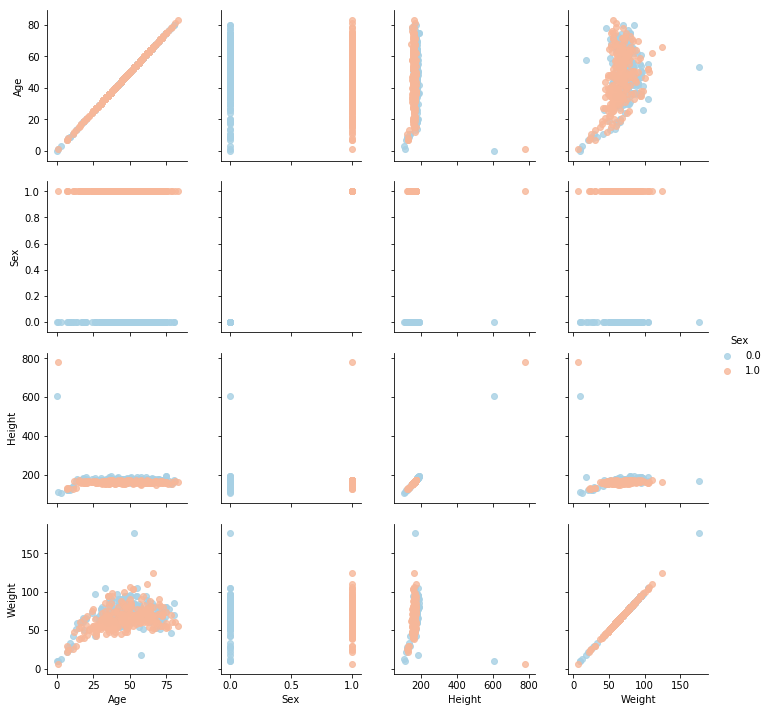

In [83]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes. I'll check the maximums of heights and weights

In [84]:
sorted(X['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was 272 cm (1940). His followers were 267 cm(1905) and 263.5 cm(1969)

Replacing 780 and 608 with 108 and 180 cm


In [85]:
X['Height']=X['Height'].replace(608,108)
X['Height']=X['Height'].replace(780,180)

In [86]:
sorted(X['Weight'], reverse=True)[:10]


[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

Looks like 176 kgs is a possible weight. I'll keep them.


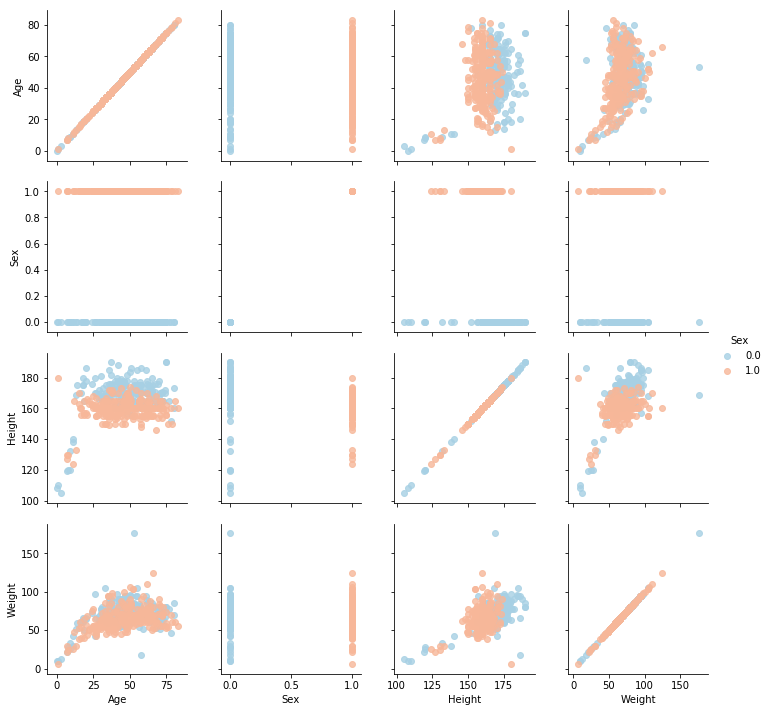

In [87]:
g = sns.PairGrid(X, vars=['Age', 'Sex', 'Height', 'Weight'],
                 hue='Sex', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

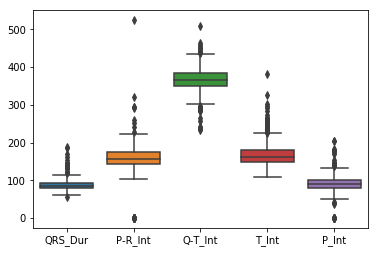

In [88]:
sns.boxplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration. 

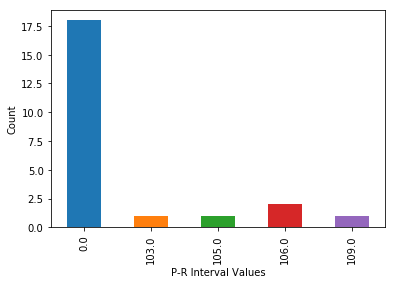

In [90]:
X['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

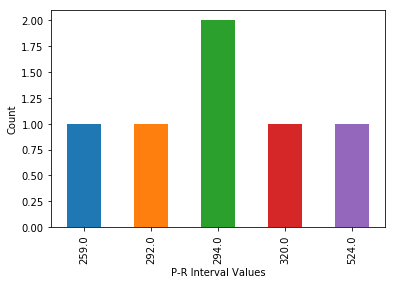

In [91]:
X['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

#### PR Interval data is including outliers 0(x18) and 524. I'll keep them.

QT interval is a measure of the time between the start of the Q wave and the end of the T wave in the heart's electrical cycle. The outlier data appearing in Q-T Interval box might be related to the outlier of T-interval data.


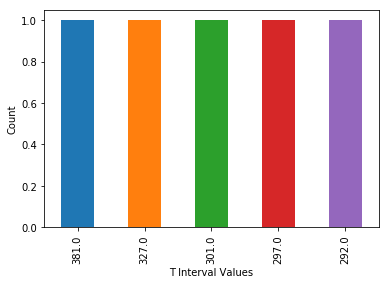

In [93]:
X['T_Int'].value_counts().sort_index(ascending=False).head().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

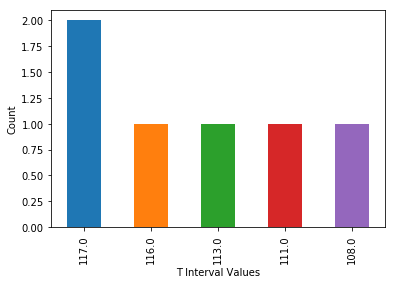

In [94]:
X['T_Int'].value_counts().sort_index(ascending=False).tail().plot(kind='bar')
plt.xlabel('T Interval Values')
plt.ylabel('Count');

Looks like 381 is an outlier value for T-interval. I want to keep that as well. Risk of causing any FP or FN's enforcing me to keep the outliers as much as possible.

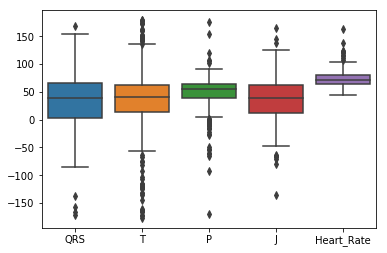

In [95]:
sns.boxplot(data=X[["QRS","T","P","J","Heart_Rate"]]);
#sns.swarmplot(data=X[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]]);

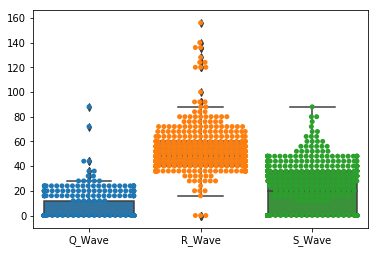

In [96]:
sns.boxplot(data=X[["Q_Wave","R_Wave","S_Wave"]])
sns.swarmplot(data=X[["Q_Wave","R_Wave","S_Wave"]]);

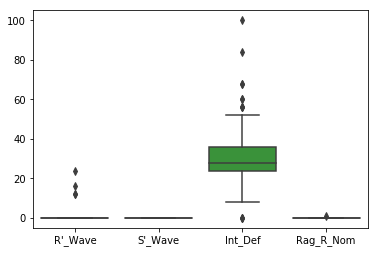

In [97]:
sns.boxplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);
#sns.swarmplot(data=X[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

S'Wave has 0's which is not a NaN. So, we can't assume it as including outliers.

In [98]:
X["R'_Wave"].value_counts().sort_index(ascending=False)

24.0      1
16.0      1
12.0      2
0.0     448
Name: R'_Wave, dtype: int64

In [99]:
X["S'_Wave"].value_counts().sort_index(ascending=False)

0.0    452
Name: S'_Wave, dtype: int64

In [100]:
X["Rag_R_Nom"].value_counts().sort_index(ascending=False)

1.0      1
0.0    451
Name: Rag_R_Nom, dtype: int64

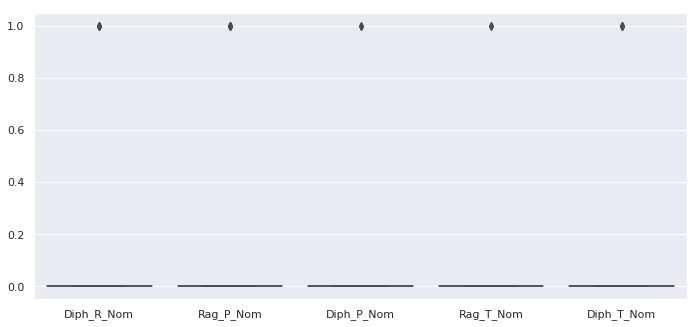

In [101]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom"]]);

In [102]:
X["Diph_R_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Diph_R_Nom, dtype: int64

In [103]:
X["Rag_P_Nom"].value_counts().sort_index(ascending=False)

1.0      5
0.0    447
Name: Rag_P_Nom, dtype: int64

In [104]:
X["Diph_P_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Diph_P_Nom, dtype: int64

In [105]:
X["Rag_T_Nom"].value_counts().sort_index(ascending=False)

1.0      2
0.0    450
Name: Rag_T_Nom, dtype: int64

In [106]:
X["Diph_T_Nom"].value_counts().sort_index(ascending=False)

1.0      4
0.0    448
Name: Diph_T_Nom, dtype: int64

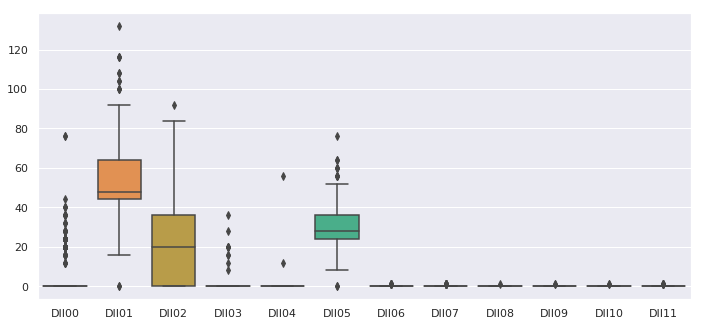

In [107]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11"]]);

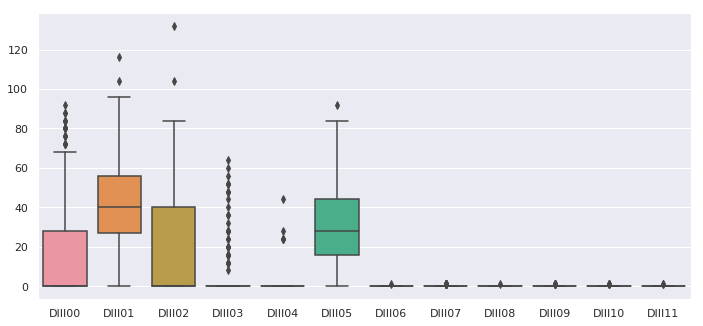

In [108]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06",
                       "DIII07","DIII08","DIII09","DIII10","DIII11"]]);

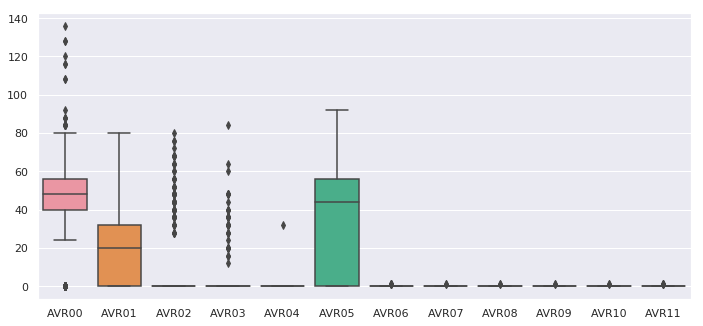

In [109]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR00","AVR01","AVR02","AVR03","AVR04","AVR05",
                       "AVR06","AVR07","AVR08","AVR09","AVR10","AVR11"]]);

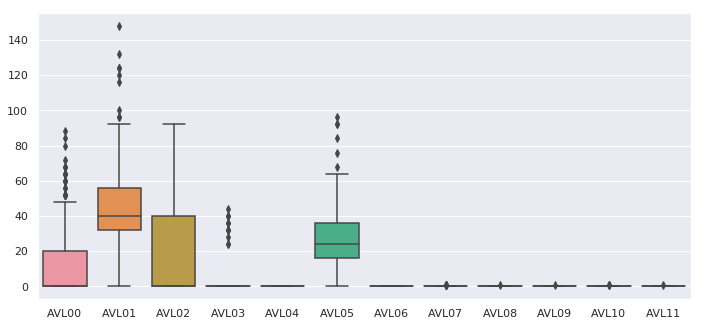

In [110]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11"]]);

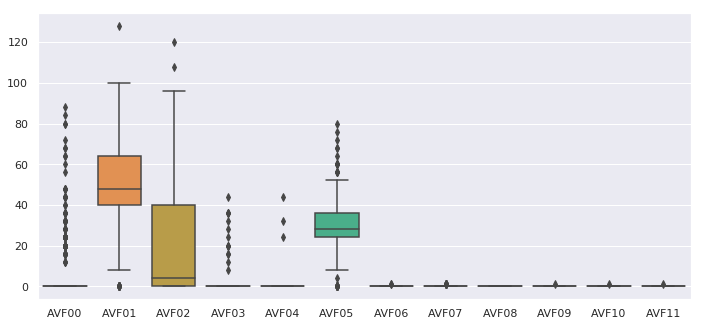

In [111]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11"]]);

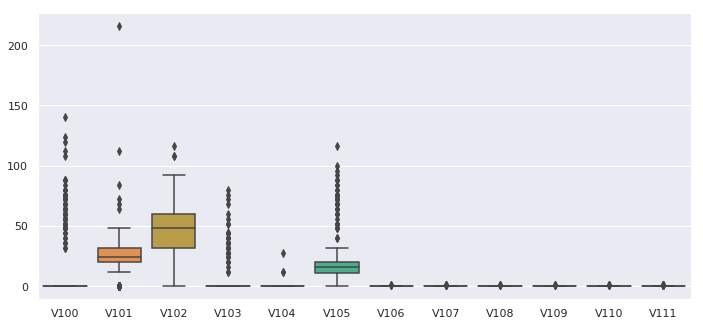

In [112]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111"]]);

In [113]:
X["V101"].value_counts().sort_index(ascending=False)

216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: V101, dtype: int64

V101 has an outlier, but when we look at other sets (V201, V301, V501) we can see that there's an outlier similarly. There might be an obese or a person with a cardhiologic problem. I want to keep these values as they are.

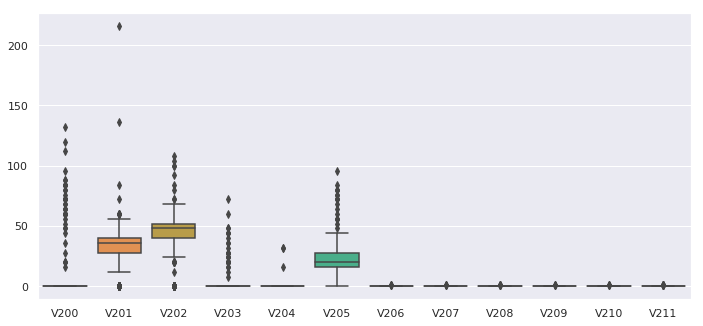

In [114]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211"]]);

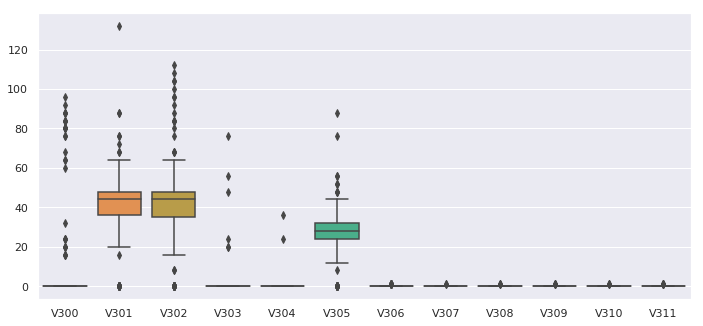

In [115]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311"]]);

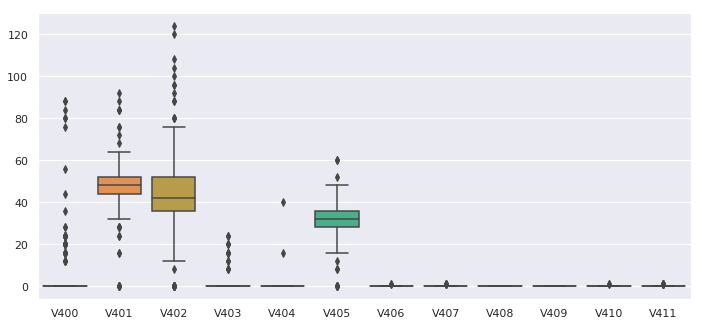

In [116]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411"]]);

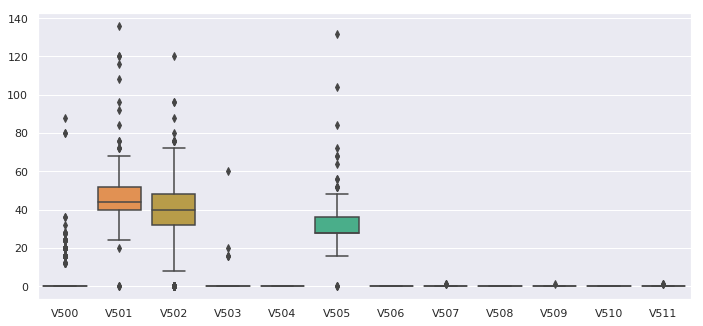

In [117]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511"]]);

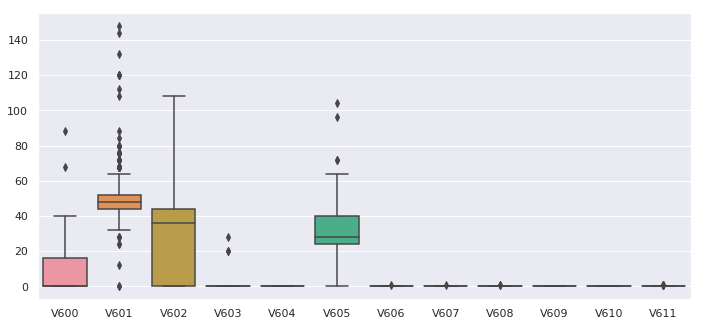

In [118]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611"]]);

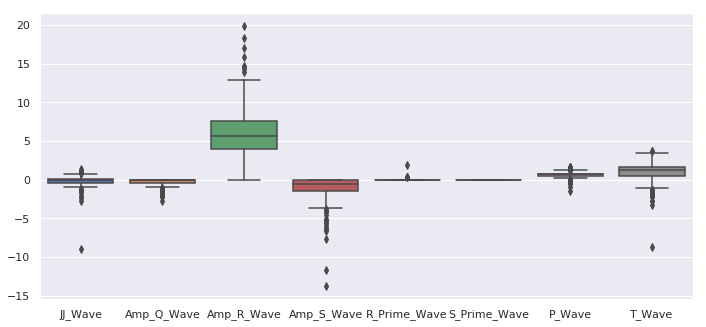

In [119]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave"]]);

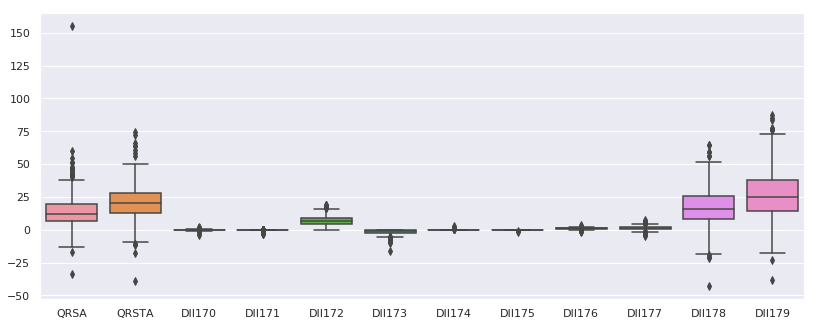

In [120]:
sns.set(rc={'figure.figsize':(13.7,5.27)})
sns.boxplot(data=X[["QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179"]]);

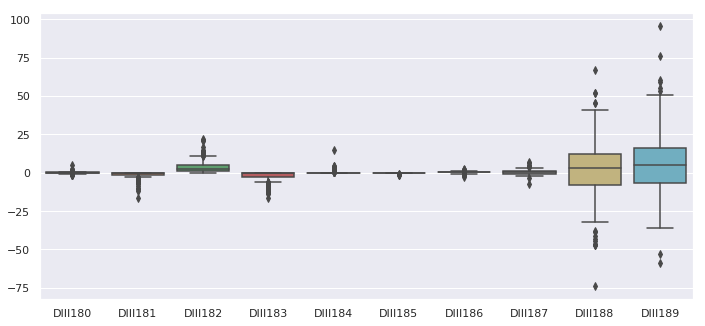

In [121]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189"]]);

Now we can see outlier within the last two attributes of each series(DIII188, DIII189, AVR198, AVR199, AVL208, AVL209, AVF218, AVF219, V2238, V2239, V3248, V3249,V4258, V4259,V5268, V5269, V6278, V6279). Similiar to the one above, assuming that there might be a person with bad values.For example, in our data set 2 instances out of 270 have Supraventricular Premature Contraction. 

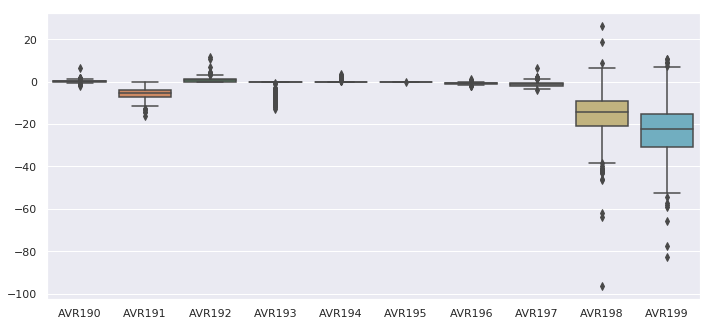

In [122]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]]);

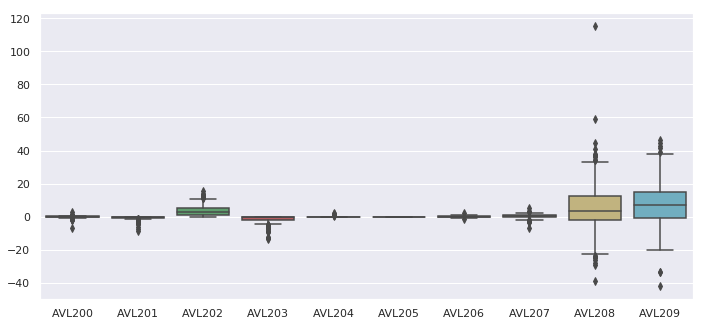

In [123]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]]);

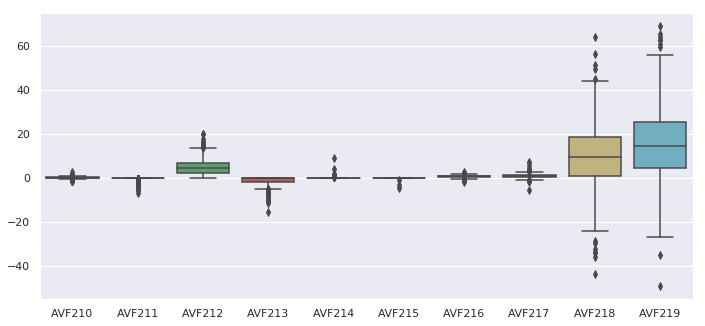

In [124]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]]);

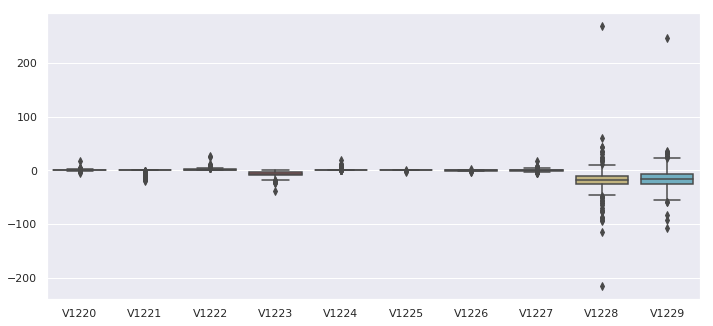

In [125]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229"]]);

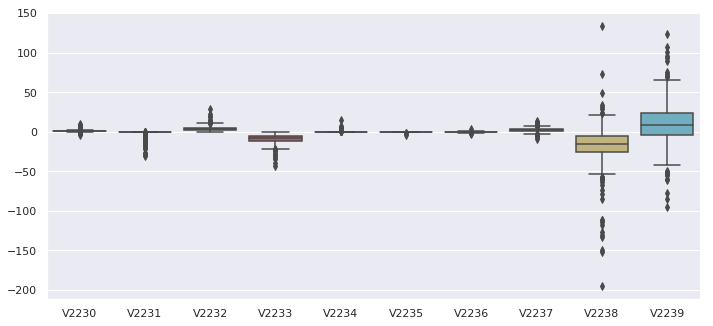

In [126]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239"]]);

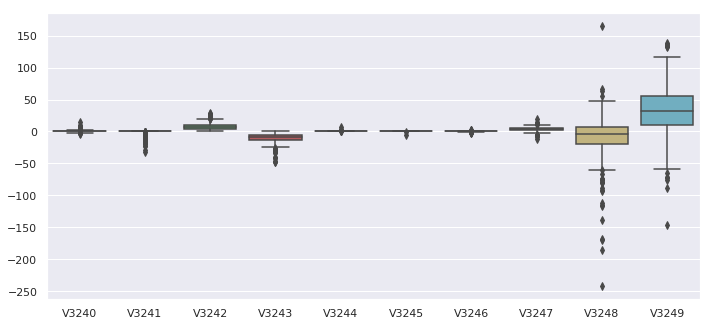

In [127]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249"]]);

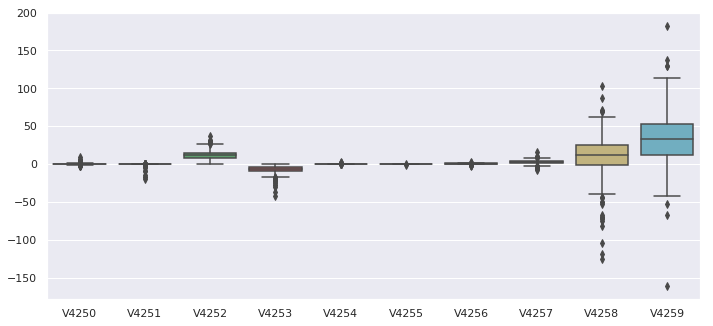

In [128]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259"]]);

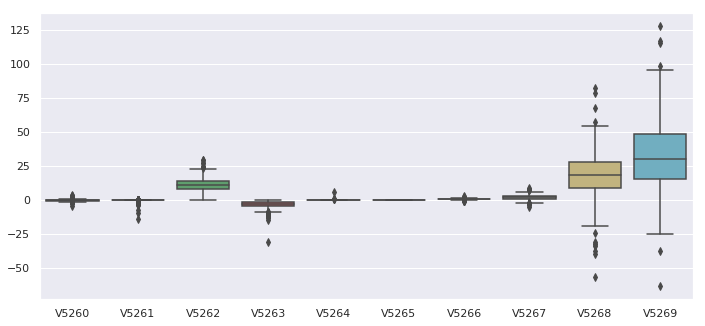

In [129]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269"]]);

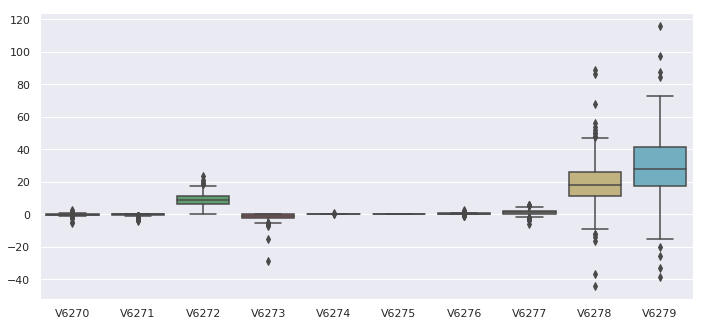

In [130]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=X[["V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279"]]);